In [1]:
"""Data inspection."""

'Data inspection.'

In [5]:
import importlib
import matplotlib
%matplotlib inline
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

import analyze
importlib.reload(analyze)
import datasets
importlib.reload(datasets)
import toylosses
importlib.reload(toylosses)
import vis
importlib.reload(vis)

NEURO_DIR = '/neuro/'

IMG_SHAPE = (100, 100)
SHAPE_STR = datasets.get_shape_string(IMG_SHAPE)
TRAIN_DATASET_PATH = '/neuro/train_val_datasets/train_conn_%s.npy' % SHAPE_STR
VAL_DATASET_PATH = '/neuro/train_val_datasets/val_conn_%s.npy' % SHAPE_STR

DATASET_PATH = TRAIN_DATASET_PATH
DATASET = np.load(DATASET_PATH)

OUTPUT = '/scratch/users/nmiolane/output_connectomes'
CMAP = 'Spectral'

From: https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf

1. netmats1: Using "full" normalized temporal correlation between every node timeseries
and every other. This is a common approach and is very simple, but it has various
practical and interpretational disadvantages [Smith 2012].
2. netmats2: Using partial temporal correlation between nodes' timeseries. This aims to
estimate direct connection strengths better than achieved by full correlation. To slightly
improve the estimates of partial correlation coefficients, a small amount of L2
regularization is applied (setting rho=0.01 in the Ridge Regression netmats option in
FSLNets) [Smith OHBM 2014, FSLNets]. 

In [2]:
print(DATASET.shape)
print(np.min(DATASET))
print(np.max(DATASET))

(649, 1, 15, 15)
-38.02203468669999
72.4955416336857


Loading /neuro/train_val_datasets/train_conn_15x15.npy
Dataset shape: (649, 1, 15, 15)


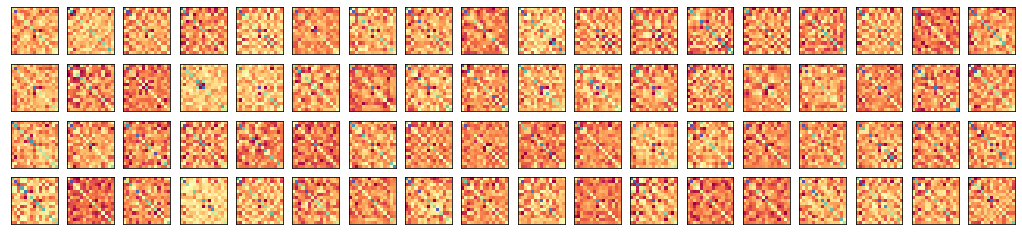

In [3]:
vis.show_data(DATASET_PATH, cmap=CMAP)

Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_12_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_12_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_12_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_12_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_12_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_12_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_12_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_12_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_12_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/outp

RuntimeError: unexpected EOF, expected 4531611 more bytes. The file might be corrupted.

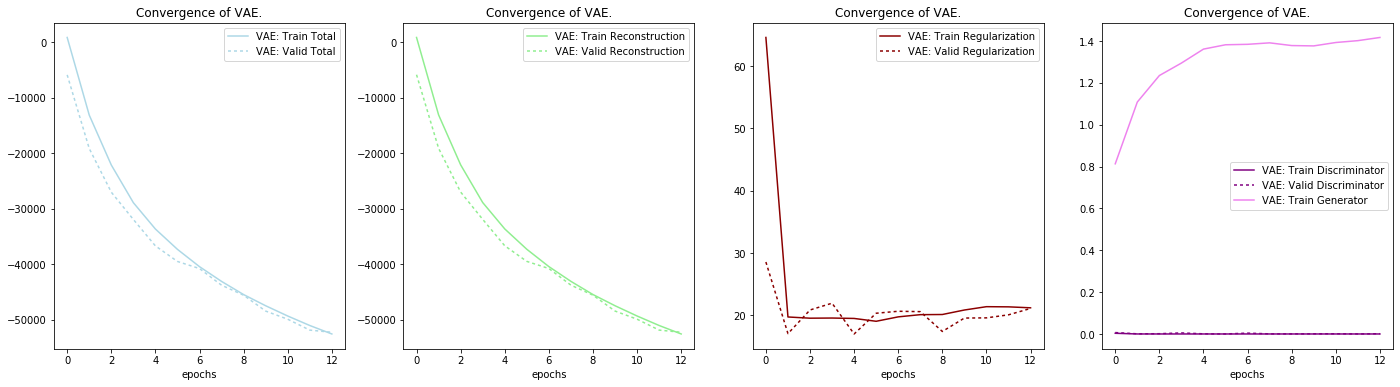

In [6]:
vis.plot_losses(output=OUTPUT)

Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_3_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_3_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_3_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_3_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_3_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_3_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_3_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_3_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_3_checkpoint.pth.
Found checkpoint. Getting: /scratch/users/nmiolane/output_connec

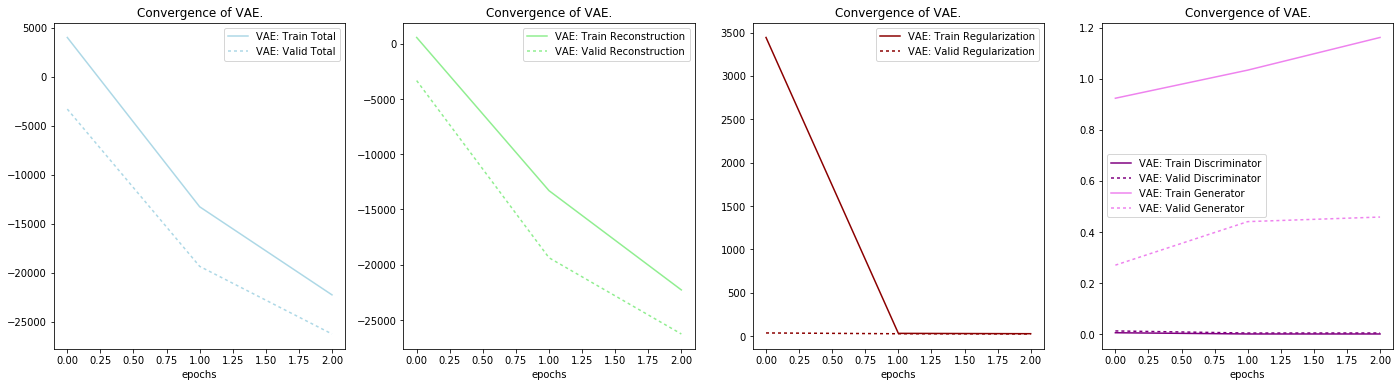

In [23]:
epoch_id = 3
vis.plot_losses(OUTPUT, epoch_id=epoch_id)

In [8]:
epoch_id = 8
vis.show_img_and_recon(
    OUTPUT, DATASET_PATH, epoch_id=epoch_id)

Loading /neuro/train_val_datasets/train_conn_100x100.npy
Dataset shape: (649, 1, 100, 100)
Loading encoder...
Found checkpoint. Getting: /scratch/users/nmiolane/output_connectomes/train_vae/epoch_8_checkpoint.pth.


KeyError: 'cnn'

Loading: /scratch/users/nmiolane/imoutput_connectomes/train_vae/decoder.pth


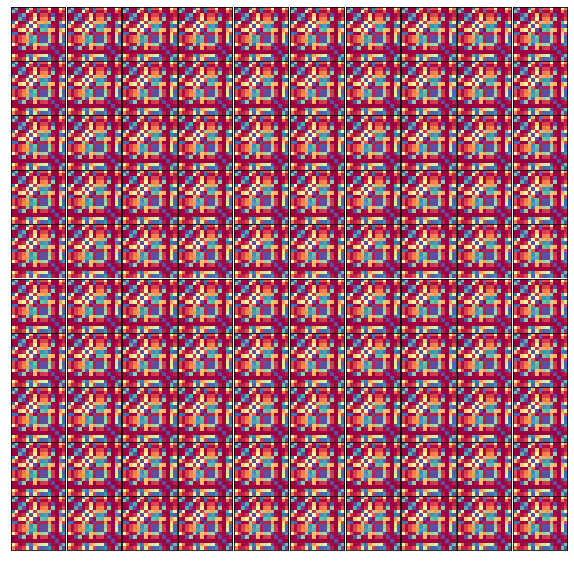

In [7]:
fig = plt.figure(figsize=(10, 10))
outer = gridspec.GridSpec(1, 1, wspace=0.1, hspace=0.1)

for i, algo_name in enumerate(['vae']):
    vis.show_samples_from_prior(
        OUTPUT, fig, outer, i, algo_name, 
        latent_dim=LATENT_DIM, data_dim=DATA_DIM, cmap=CMAP)
fig.show()

/scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_10_checkpoint.pth
Found checkpoints. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_10_checkpoint.pth.


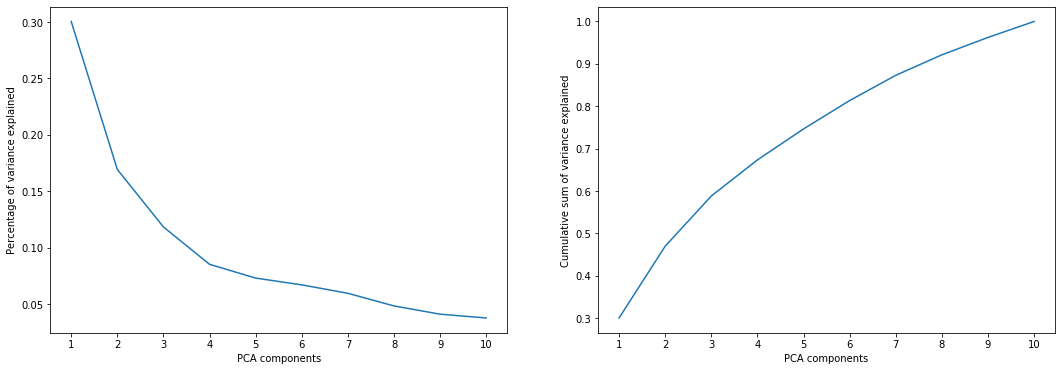

In [8]:
epoch_id = 10
ax = vis.plot_variance_explained(
    OUTPUT, TRAIN_IMG_PATH, epoch_id=epoch_id)

/scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_10_checkpoint.pth
Found checkpoints. Getting: /scratch/users/nmiolane/imoutput_connectomes/train_vae/epoch_10_checkpoint.pth.


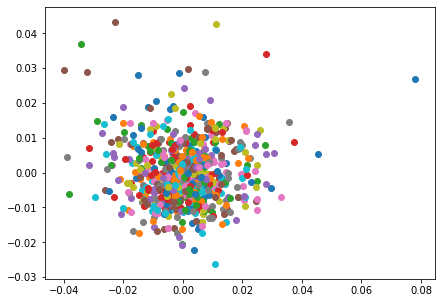

In [9]:
epoch_id = 10
n_pcs = 2
dataset = np.load(TRAIN_IMG_PATH)

mus = analyze.latent_projection(
    output_dir=OUTPUT, dataset=dataset, latent_dim=LATENT_DIM, data_dim=DATA_DIM, epoch_id=epoch_id, 
    cnn=True, img_shape=IMG_SHAPE)
_, projected_mus = analyze.pca_projection(mus, n_pcs)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

for mu in projected_mus:
    if n_pcs == 2:
        im = ax.scatter(mu[0], mu[1]) 
    else:
        im = ax.scatter(mu[0], mu[1], mu[2])